In [ ]:
import pandas as pd

# Чтение parquet файла
df = pd.read_parquet(',../auto_ru_cars_price.parquet')

# Просмотр первых строк
df.head()

,is_available,gen,year,mileage,color,equipment,tax,transmission,drive,wheel_type,state,owners,price,model_name,description
0,True,I,2022,155899,голубой,40 опций,4970,роботизированная,передний,Левый,Не требует ремонта,1 владелец,984000,"Haval Jolion, 2022",Номер лота: ВАВ/ 3461016Покупая автомобиль в Е...
1,True,II,2016,174000,белый,HSE,18600,автоматическая,полный,Левый,Не требует ремонта,2 владельца,3400000,"Land Rover Range Rover Sport, 2016","Автомобиль в отличном состоянии.Не бит, не кра..."
2,True,I,2014,80000,чёрный,1 опция,57000,автоматическая,задний,Левый,Не требует ремонта,3 или более,3600000,"Jaguar F-Type S, 2014","В моем владении почти 2 года, накатал 30.000км..."
3,True,VIII (XV70),2018,211228,белый,Стандарт Плюс,9050,автоматическая,передний,Левый,Не требует ремонта,1 владелец,1833500,"Toyota Camry, 2018",ПРОДАЖА ОСУЩЕСТВЛЯЕТСЯ ТОЛЬКО ФИЗИЧЕСКИМ ЛИЦАМ...
4,True,III,2020,95000,серый,29 опций,14472,автоматическая,передний,Левый,Не требует ремонта,2 владельца,2890000,"Kia Carnival, 2020","Я второй владелец , купил с пробегом 75 тыс На..."


In [9]:

# Информация о датасете
print(df.info())
print(df.describe())
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3185 entries, 0 to 3184
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_available  3185 non-null   bool  
 1   gen           3185 non-null   object
 2   year          3185 non-null   int64 
 3   mileage       3185 non-null   int64 
 4   color         3185 non-null   object
 5   equipment     3185 non-null   object
 6   tax           3185 non-null   object
 7   transmission  3185 non-null   object
 8   drive         3185 non-null   object
 9   wheel_type    3185 non-null   object
 10  state         3185 non-null   object
 11  owners        3185 non-null   object
 12  price         3185 non-null   int64 
 13  model_name    3185 non-null   object
 14  description   3185 non-null   object
dtypes: bool(1), int64(3), object(11)
memory usage: 351.6+ KB
None
              year        mileage         price
count  3185.000000    3185.000000  3.185000e+03
mean   2018.3299

(3185, 15)

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Настройка отображения
plt.style.use('default')
sns.set_palette("husl")

In [18]:
# Проверка пропусков, нулей и пустых значений
print("=== АНАЛИЗ ПРОПУСКОВ ===")
for col in df.columns:
    null_count = df[col].isnull().sum()
    if df[col].dtype in ['int64', 'float64']:
        zero_count = (df[col] == 0).sum()
        total_empty = null_count + zero_count
        print(f"{col}: NaN={null_count}, нули={zero_count}, всего пустых={total_empty}")
    elif df[col].dtype == 'object':
        empty_count = (df[col] == '').sum()
        total_empty = null_count + empty_count
        print(f"{col}: NaN={null_count}, пустые строки={empty_count}, всего пустых={total_empty}")

# Общая статистика
total_empty = sum((df == 0).sum()) + df.isnull().sum().sum() + sum((df.select_dtypes(include=['object']) == '').sum())
print(f"\nОбщий % пустых значений: {total_empty / (df.shape[0] * df.shape[1]) * 100:.2f}%")

# Дубликаты
print(f"Дубликаты: {df.duplicated().sum()}")

# Уникальные значения
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} уникальных значений")

=== АНАЛИЗ ПРОПУСКОВ ===
gen: NaN=0, пустые строки=0, всего пустых=0
year: NaN=0, нули=0, всего пустых=0
mileage: NaN=0, нули=0, всего пустых=0
color: NaN=0, пустые строки=0, всего пустых=0
equipment: NaN=0, пустые строки=0, всего пустых=0
tax: NaN=0, пустые строки=0, всего пустых=0
transmission: NaN=0, пустые строки=0, всего пустых=0
drive: NaN=0, пустые строки=0, всего пустых=0
wheel_type: NaN=0, пустые строки=0, всего пустых=0
state: NaN=0, пустые строки=0, всего пустых=0
owners: NaN=0, пустые строки=0, всего пустых=0
price: NaN=0, нули=0, всего пустых=0
model_name: NaN=0, пустые строки=0, всего пустых=0
description: NaN=0, пустые строки=0, всего пустых=0

Общий % пустых значений: 0.59%
Дубликаты: 104
is_available: 2 уникальных значений
gen: 326 уникальных значений
color: 15 уникальных значений
equipment: 703 уникальных значений
tax: 524 уникальных значений
transmission: 4 уникальных значений
drive: 3 уникальных значений
wheel_type: 2 уникальных значений
state: 1 уникальных значений

In [21]:
# Краткий анализ дубликатов description
dup_desc = df['description'].duplicated().sum()
print(f"Дубликатов в description: {dup_desc}")

# Топ-3 самых частых описания
print("\nТоп-5 описания:")
print(df['description'].value_counts().head(5))

Дубликатов в description: 941

Топ-5 описания:
description
MAJOR EXPERT - ЛИДЕР ПО ПРОДАЖАМ АВТОМОБИЛЕЙ С ПРОБЕГОМ В МОСКВЕУважаемые клиенты, мы поставили перед собой цель, сделать процесс приобретения автомобиля с пробегом для вас максимально комфортным, безопасным и выгодным. Вот уже на протяжении почти 20 лет движемся в этом направлении и стараемся предугадать ваши желания.ДЛЯ ВАС ДОСТУПНЫ:Позвоните нам и мы поможем вам сделать правильный выбор.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

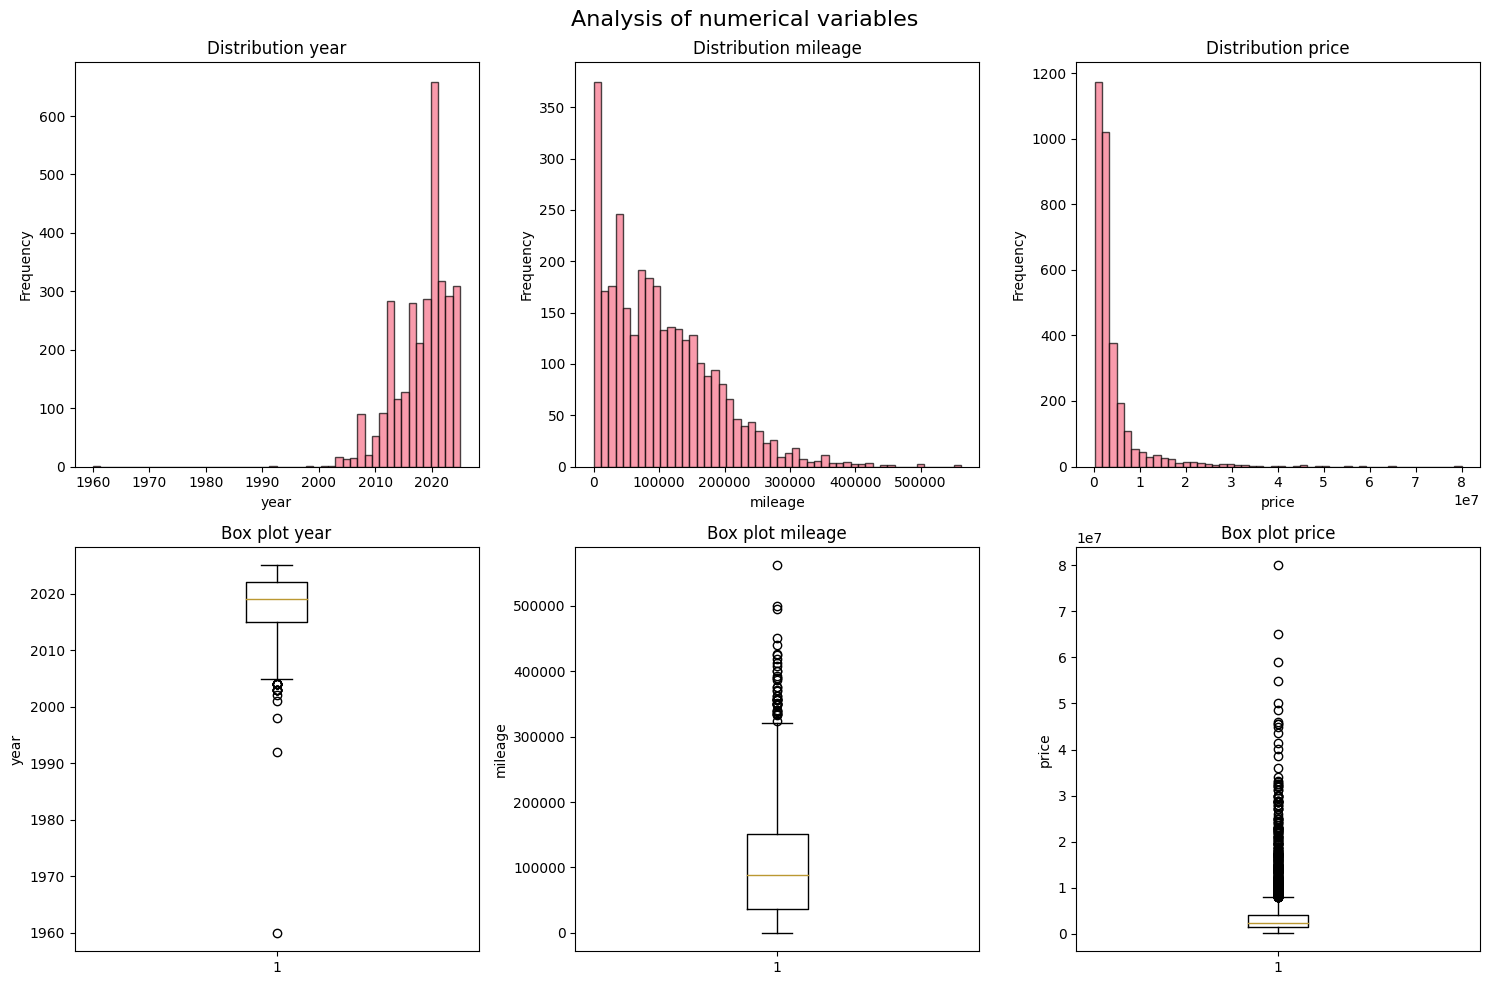

Статистики распределения:

year:
  Скошенность: -1.354
  Эксцесс: 6.811

mileage:
  Скошенность: 0.984
  Эксцесс: 1.157

price:
  Скошенность: 4.747
  Эксцесс: 33.583


In [33]:
# Расширенная статистика
numeric_cols = ['year', 'mileage', 'price']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Analysis of numerical variables', fontsize=16)

for i, col in enumerate(numeric_cols):
    # Гистограммы
    axes[0, i].hist(df[col], bins=50, alpha=0.7, edgecolor='black')
    axes[0, i].set_title(f'Distribution {col}')
    axes[0, i].set_xlabel(col)
    axes[0, i].set_ylabel('Frequency')
    
    # Box plots
    axes[1, i].boxplot(df[col])
    axes[1, i].set_title(f'Box plot {col}')
    axes[1, i].set_ylabel(col)

plt.tight_layout()
plt.savefig('numeric_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Статистики по скошенности и эксцессу
print("Статистики распределения:")
for col in numeric_cols:
    print(f"\n{col}:")
    print(f"  Скошенность: {stats.skew(df[col]):.3f}")
    print(f"  Эксцесс: {stats.kurtosis(df[col]):.3f}")

In [23]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, len(outliers)

print("Анализ выбросов (метод IQR):")
for col in numeric_cols:
    outliers, count = detect_outliers(df, col)
    percentage = (count / len(df)) * 100
    print(f"{col}: {count} выбросов ({percentage:.2f}%)")

Анализ выбросов (метод IQR):
year: 21 выбросов (0.66%)
mileage: 43 выбросов (1.35%)
price: 324 выбросов (10.17%)


In [24]:
# Функция для выявления выбросов методом IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, len(outliers)

# Анализ выбросов для числовых колонок
numeric_cols = ['year', 'mileage', 'price']

print("=== АНАЛИЗ ВЫБРОСОВ (метод IQR) ===")
for col in numeric_cols:
    outliers, count = detect_outliers(df, col)
    percentage = (count / len(df)) * 100
    print(f"\n{col}: {count} выбросов ({percentage:.2f}%)")
    
    if count > 0:
        print(f"  Диапазон нормальных значений: {df[col].quantile(0.25) - 1.5*(df[col].quantile(0.75) - df[col].quantile(0.25)):.0f} - {df[col].quantile(0.75) + 1.5*(df[col].quantile(0.75) - df[col].quantile(0.25)):.0f}")
        print(f"  Примеры выбросов:")
        print(outliers[['model_name', col]].head())
        print(f"  Мин/Макс выбросы: {outliers[col].min():.0f} / {outliers[col].max():.0f}")

=== АНАЛИЗ ВЫБРОСОВ (метод IQR) ===

year: 21 выбросов (0.66%)
  Диапазон нормальных значений: 2004 - 2032
  Примеры выбросов:
               model_name  year
74   Chevrolet Niva, 2004  2004
185      Opel Astra, 2004  2004
231    Toyota Passo, 2004  2004
569      Honda CR-V, 2004  2004
785     Ford Escape, 2004  2004
  Мин/Макс выбросы: 1960 / 2004

mileage: 43 выбросов (1.35%)
  Диапазон нормальных значений: -134408 - 323296
  Примеры выбросов:
                          model_name  mileage
81          Volkswagen Touareg, 2011   357380
88   Toyota Land Cruiser Prado, 2015   400000
217        Jeep Grand Cherokee, 2013   340114
280          Chevrolet Captiva, 2008   400512
307             Renault Duster, 2012   356761
  Мин/Макс выбросы: 323373 / 561575

price: 324 выбросов (10.17%)
  Диапазон нормальных значений: -2605000 - 7955000
  Примеры выбросов:
                         model_name     price
9     Mercedes-Benz GLS 450 d, 2024  16600000
15  Toyota Land Cruiser Prado, 2024   8299999

In [25]:
# Функция для выявления выбросов методом IQR
def detect_outliers_top(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Нижние и верхние выбросы отдельно
    lower_outliers = df[df[column] < lower_bound]
    upper_outliers = df[df[column] > upper_bound]
    
    return lower_outliers, upper_outliers, lower_bound, upper_bound

# Анализ выбросов для числовых колонок
numeric_cols = ['year', 'mileage', 'price']

print("=== АНАЛИЗ ВЫБРОСОВ (метод IQR) ===")
for col in numeric_cols:
    lower_outliers, upper_outliers, lower_bound, upper_bound = detect_outliers_top(df, col)
    
    total_outliers = len(lower_outliers) + len(upper_outliers)
    percentage = (total_outliers / len(df)) * 100
    
    print(f"\n{col}: {total_outliers} выбросов ({percentage:.2f}%)")
    print(f"  Нормальный диапазон: {lower_bound:.0f} - {upper_bound:.0f}")
    
    # Топ-5 минимальных выбросов
    if len(lower_outliers) > 0:
        print(f"  Топ-5 минимальных выбросов:")
        min_outliers = lower_outliers.nsmallest(5, col)[['model_name', 'year', col]]
        for idx, row in min_outliers.iterrows():
            print(f"    {row['model_name']} ({row['year']}): {row[col]}")
    
    # Топ-5 максимальных выбросов
    if len(upper_outliers) > 0:
        print(f"  Топ-5 максимальных выбросов:")
        max_outliers = upper_outliers.nlargest(5, col)[['model_name', 'year', col]]
        for idx, row in max_outliers.iterrows():
            print(f"    {row['model_name']} ({row['year']}): {row[col]:,.0f}")

=== АНАЛИЗ ВЫБРОСОВ (метод IQR) ===

year: 21 выбросов (0.66%)
  Нормальный диапазон: 2004 - 2032
  Топ-5 минимальных выбросов:
    Mercedes-Benz 190 SL, 1960 (year    1960
year    1960
Name: 3081, dtype: object): year    1960
year    1960
Name: 3081, dtype: object
    Mercedes-Benz SL-Класс 300, 1992 (year    1992
year    1992
Name: 1007, dtype: object): year    1992
year    1992
Name: 1007, dtype: object
    Mercedes-Benz S-Класс 500 Long, 1998 (year    1998
year    1998
Name: 2831, dtype: object): year    1998
year    1998
Name: 2831, dtype: object
    Acura MDX, 2001 (year    2001
year    2001
Name: 2323, dtype: object): year    2001
year    2001
Name: 2323, dtype: object
    Mercedes-Benz M-Класс 320, 2002 (year    2002
year    2002
Name: 2094, dtype: object): year    2002
year    2002
Name: 2094, dtype: object

mileage: 43 выбросов (1.35%)
  Нормальный диапазон: -134408 - 323296
  Топ-5 максимальных выбросов:
    Mitsubishi Pajero Sport, 2012 (2012): 561,575
    Mitsubishi Outlan


=== Анализ переменной: gen ===
Количество уникальных значений: 326
Топ-10 значений:
gen
I                 722
I Рестайлинг      468
II                251
II Рестайлинг     158
III               143
IV                136
IV Рестайлинг      94
III Рестайлинг     89
V                  34
I Рестайлинг 2     32
Name: count, dtype: int64

=== Анализ переменной: color ===
Количество уникальных значений: 15
Топ-10 значений:
color
чёрный         886
белый          751
серый          613
синий          272
красный        157
серебристый    145
коричневый     129
зелёный         67
голубой         39
бежевый         39
Name: count, dtype: int64


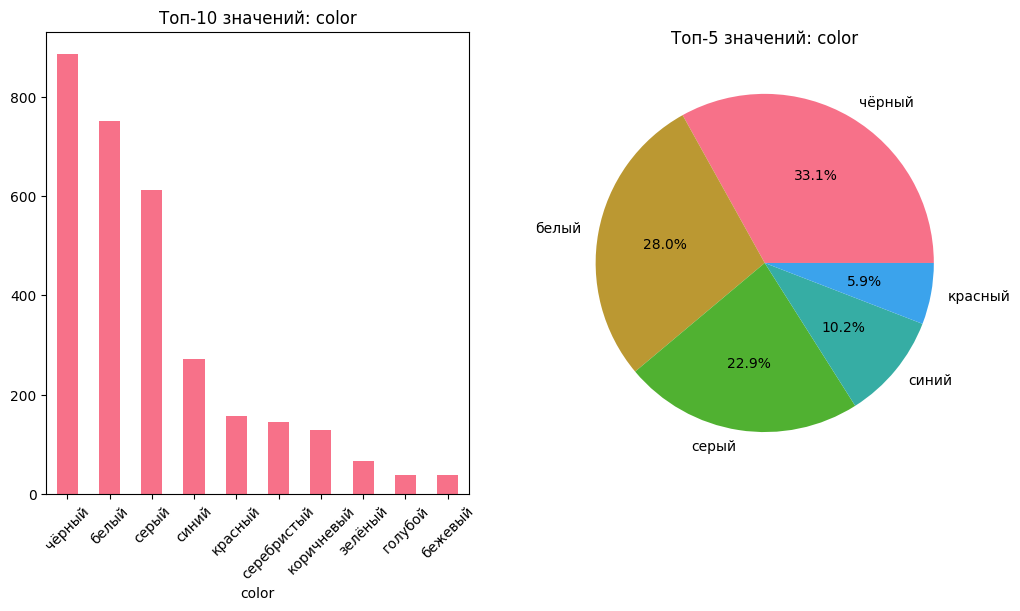


=== Анализ переменной: transmission ===
Количество уникальных значений: 4
Топ-4 значений:
transmission
автоматическая      1994
роботизированная     537
вариатор             392
механическая         262
Name: count, dtype: int64


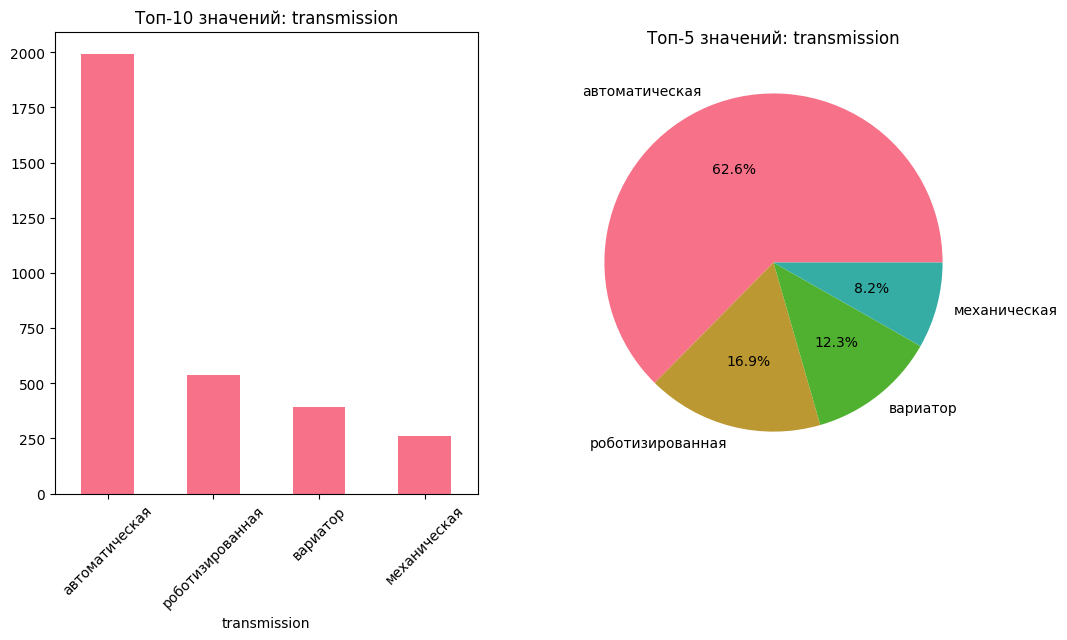


=== Анализ переменной: drive ===
Количество уникальных значений: 3
Топ-3 значений:
drive
полный      1948
передний    1128
задний       109
Name: count, dtype: int64


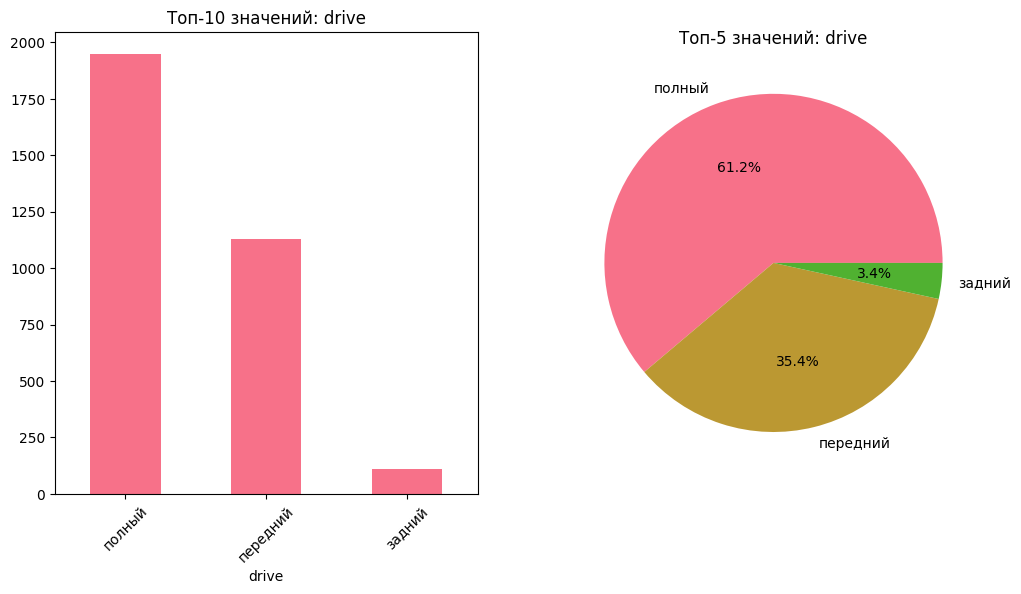


=== Анализ переменной: owners ===
Количество уникальных значений: 3
Топ-3 значений:
owners
1 владелец     2001
2 владельца     741
3 или более     443
Name: count, dtype: int64


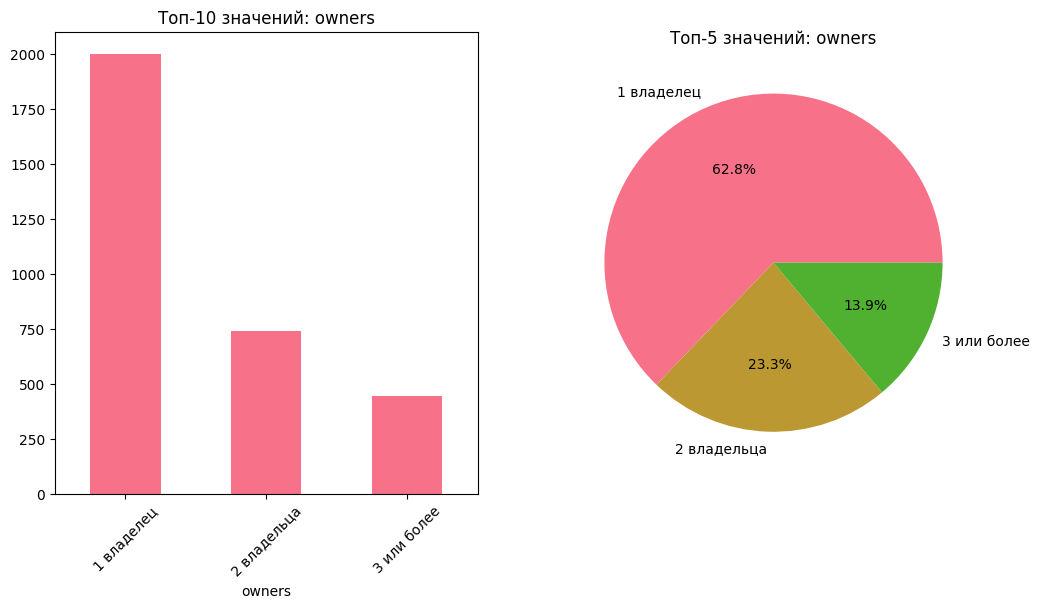

In [35]:
# Функция для анализа категориальных переменных
def analyze_categorical(df, col, max_categories=10):
    print(f"\n=== Анализ переменной: {col} ===")
    value_counts = df[col].value_counts()
    print(f"Количество уникальных значений: {len(value_counts)}")
    print(f"Топ-{min(max_categories, len(value_counts))} значений:")
    print(value_counts.head(max_categories))
    
    # Визуализация
    if len(value_counts) <= 20:  # Если категорий не слишком много
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        value_counts.head(10).plot(kind='bar')
        plt.title(f'Топ-10 значений: {col}')
        plt.xticks(rotation=45)
        
        plt.subplot(1, 2, 2)
        plt.pie(value_counts.head(5).values, labels=value_counts.head(5).index, autopct='%1.1f%%')
        plt.title(f'Топ-5 значений: {col}')
        plt.savefig(f'{col}_analysis.png', dpi=300, bbox_inches='tight')
        plt.show()
    
    return value_counts

# Анализ основных категориальных переменных
for col in ['gen', 'color', 'transmission', 'drive', 'owners']:
    analyze_categorical(df, col)

=== Анализ цены ===
Медианная цена: 2,200,000
Средняя цена: 3,924,560
Стандартное отклонение: 5,587,511


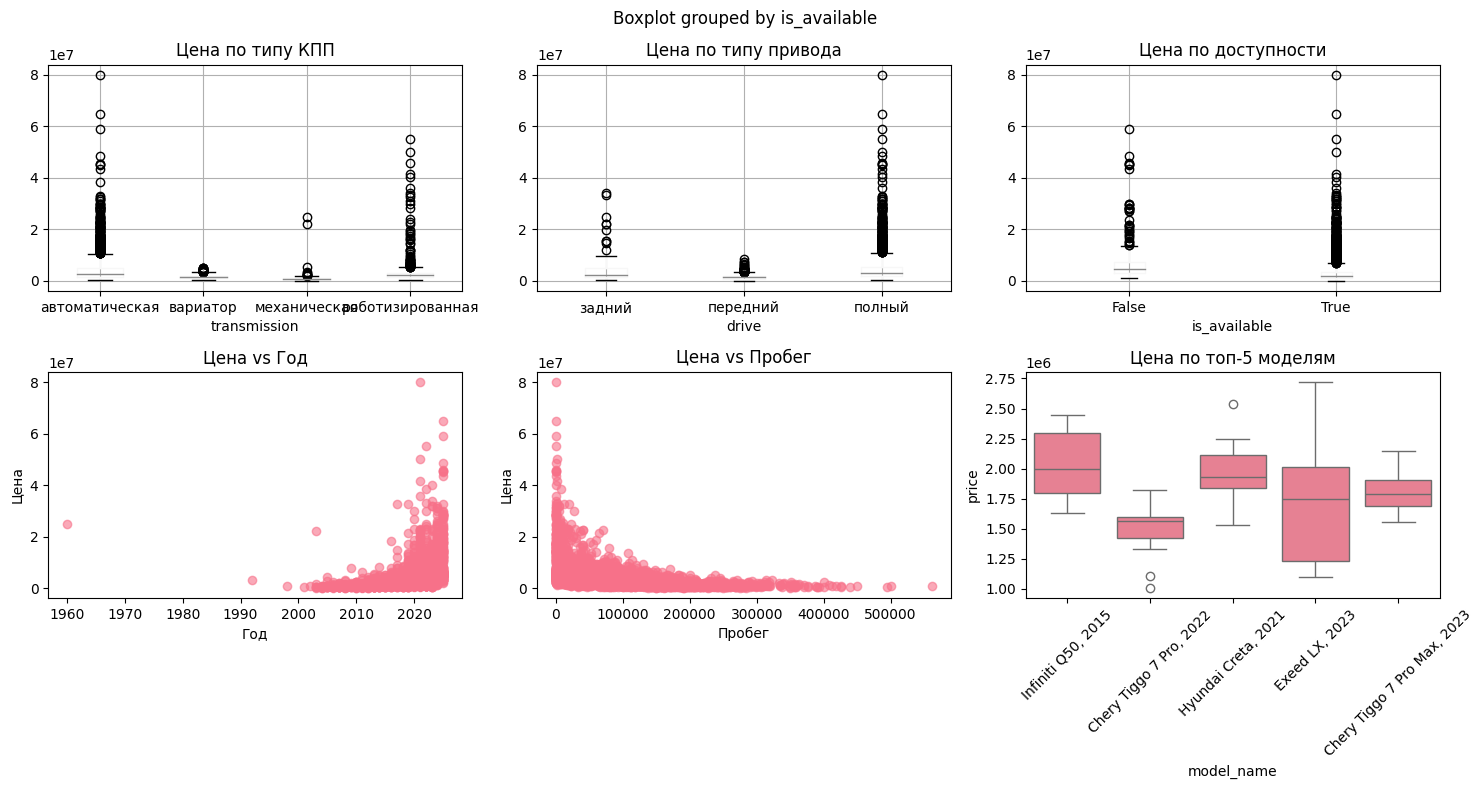

In [36]:
# Анализ цены (предполагая, что это целевая переменная)
print("=== Анализ цены ===")
print(f"Медианная цена: {df['price'].median():,.0f}")
print(f"Средняя цена: {df['price'].mean():,.0f}")
print(f"Стандартное отклонение: {df['price'].std():,.0f}")

# Цена по поколениям
plt.figure(figsize=(15, 8))
plt.subplot(2, 3, 1)
df.boxplot(column='price', by='transmission', ax=plt.gca())
plt.title('Цена по типу КПП')

plt.subplot(2, 3, 2)
df.boxplot(column='price', by='drive', ax=plt.gca())
plt.title('Цена по типу привода')

plt.subplot(2, 3, 3)
df.boxplot(column='price', by='is_available', ax=plt.gca())
plt.title('Цена по доступности')

# Scatterplots
plt.subplot(2, 3, 4)
plt.scatter(df['year'], df['price'], alpha=0.6)
plt.xlabel('Год')
plt.ylabel('Цена')
plt.title('Цена vs Год')

plt.subplot(2, 3, 5)
plt.scatter(df['mileage'], df['price'], alpha=0.6)
plt.xlabel('Пробег')
plt.ylabel('Цена')
plt.title('Цена vs Пробег')

plt.subplot(2, 3, 6)
# Топ моделей по количеству
top_models = df['model_name'].value_counts().head(5).index
df_top_models = df[df['model_name'].isin(top_models)]
sns.boxplot(data=df_top_models, x='model_name', y='price')
plt.xticks(rotation=45)
plt.title('Цена по топ-5 моделям')

plt.tight_layout()
plt.savefig(f'price_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

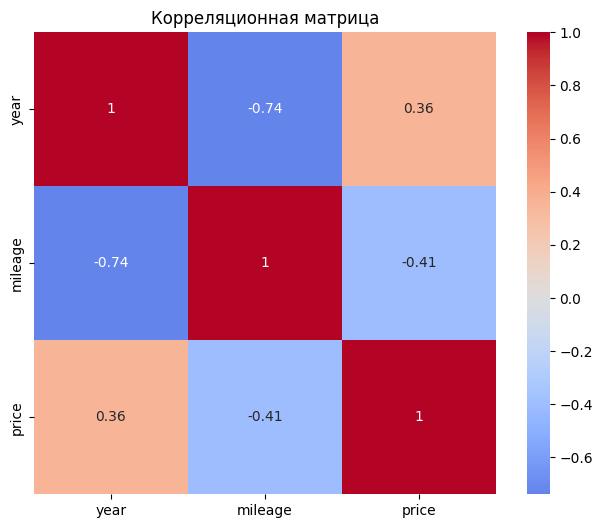

Корреляции с ценой:
price      1.000000
mileage   -0.410812
year       0.355806
Name: price, dtype: float64
Корреляции с годом:
year       1.000000
mileage   -0.738977
price      0.355806
Name: year, dtype: float64


In [37]:
# Корреляция числовых переменных
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Корреляционная матрица')
plt.savefig(f'corelation.png', dpi=300, bbox_inches='tight')
plt.show()

print("Корреляции с ценой:")
price_corr = df[numeric_cols].corr()['price'].sort_values(key=abs, ascending=False)
print(price_corr)

print("Корреляции с годом:")
price_corr = df[numeric_cols].corr()['year'].sort_values(key=abs, ascending=False)
print(price_corr)

=== Анализ по годам ===
Статистика по годам (последние 10 лет):
     price                          mileage
     count        mean     median      mean
year                                       
2016   116   2446595.0  1955000.0  136703.0
2017   164   2556705.0  1899000.0  129079.0
2018   211   2523388.0  2070000.0  123738.0
2019   286   3393074.0  2538500.0  103224.0
2020   253   4061581.0  2647000.0   88830.0
2021   406   4800767.0  2885000.0   69912.0
2022   317   4512647.0  2719000.0   47458.0
2023   292   4234134.0  2535000.0   35241.0
2024   167   9346693.0  6900000.0    6349.0
2025   142  13610858.0  7987500.0     410.0


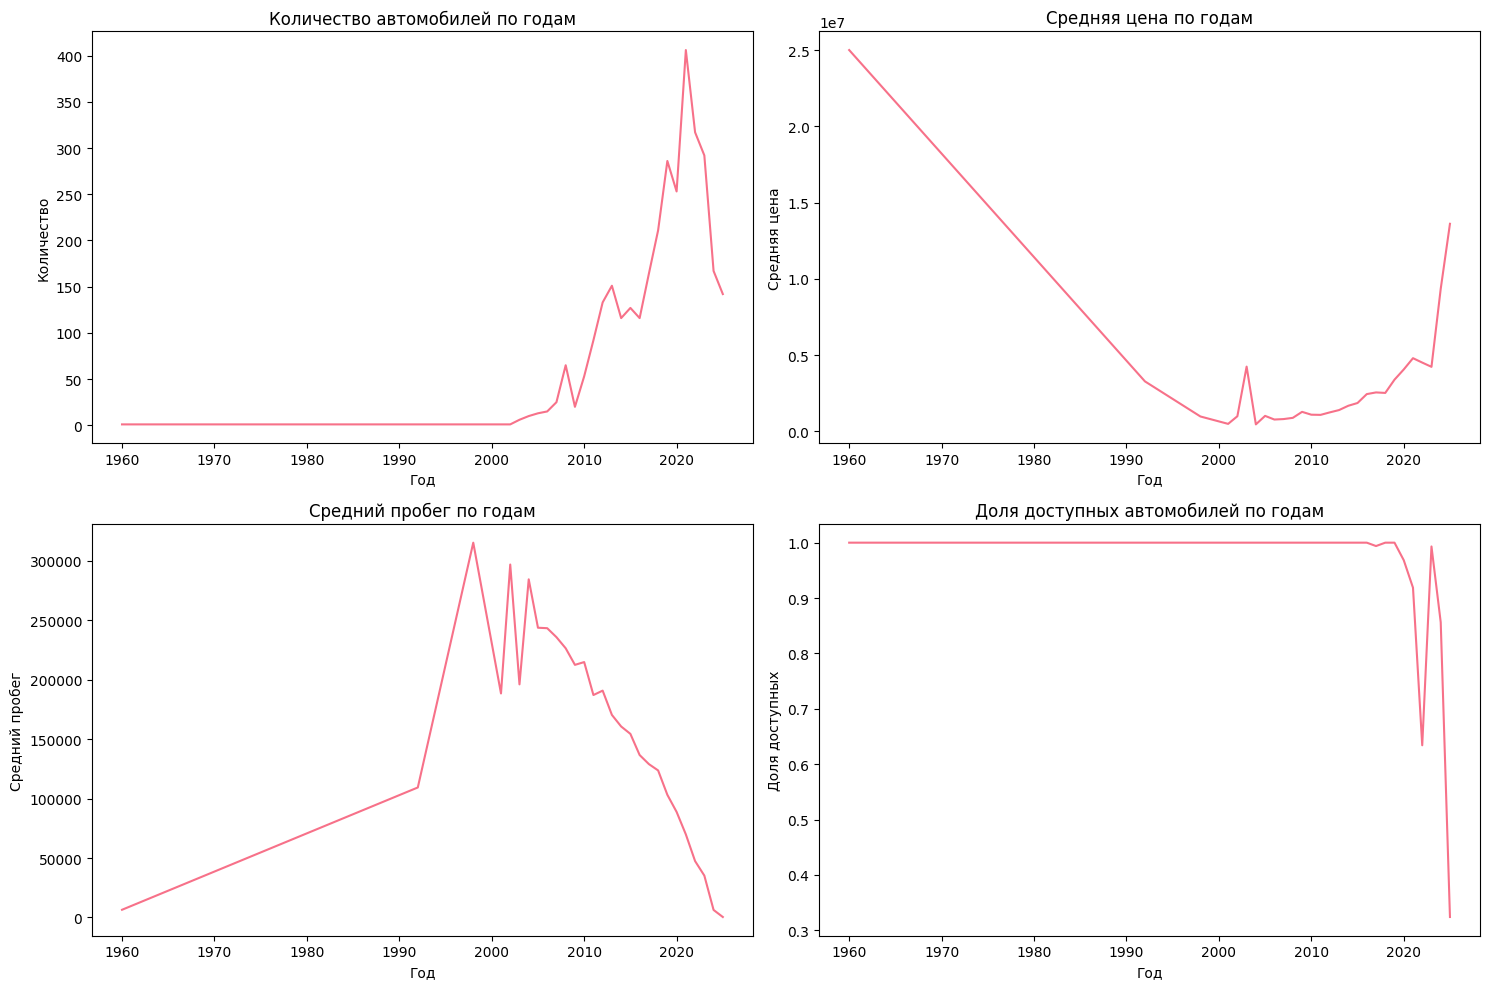

In [38]:
# Анализ по годам
print("=== Анализ по годам ===")
yearly_stats = df.groupby('year').agg({
    'price': ['count', 'mean', 'median'],
    'mileage': 'mean'
}).round(0)

print("Статистика по годам (последние 10 лет):")
print(yearly_stats.tail(10))

# Тренды по годам
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Количество автомобилей по годам
yearly_counts = df['year'].value_counts().sort_index()
axes[0, 0].plot(yearly_counts.index, yearly_counts.values)
axes[0, 0].set_title('Количество автомобилей по годам')
axes[0, 0].set_xlabel('Год')
axes[0, 0].set_ylabel('Количество')

# Средняя цена по годам
yearly_price = df.groupby('year')['price'].mean()
axes[0, 1].plot(yearly_price.index, yearly_price.values)
axes[0, 1].set_title('Средняя цена по годам')
axes[0, 1].set_xlabel('Год')
axes[0, 1].set_ylabel('Средняя цена')

# Средний пробег по годам
yearly_mileage = df.groupby('year')['mileage'].mean()
axes[1, 0].plot(yearly_mileage.index, yearly_mileage.values)
axes[1, 0].set_title('Средний пробег по годам')
axes[1, 0].set_xlabel('Год')
axes[1, 0].set_ylabel('Средний пробег')

# Доступность по годам
yearly_availability = df.groupby('year')['is_available'].mean()
axes[1, 1].plot(yearly_availability.index, yearly_availability.values)
axes[1, 1].set_title('Доля доступных автомобилей по годам')
axes[1, 1].set_xlabel('Год')
axes[1, 1].set_ylabel('Доля доступных')

plt.tight_layout()
plt.savefig(f'time_series.png', dpi=300, bbox_inches='tight')
plt.show()

In [30]:
print("=== ИТОГОВЫЙ ОТЧЕТ ===")
print(f"Размер датасета: {df.shape[0]} строк, {df.shape[1]} столбцов")
print(f"Период: {df['year'].min()} - {df['year'].max()}")
print(f"Диапазон цен: {df['price'].min():,.0f} - {df['price'].max():,.0f}")
print(f"Диапазон пробега: {df['mileage'].min():,.0f} - {df['mileage'].max():,.0f} км")
print(f"Самые популярные модели: {', '.join(df['model_name'].value_counts().head(3).index.tolist())}")
print(f"Самые популярные цвета: {', '.join(df['color'].value_counts().head(3).index.tolist())}")
print(f"Доля доступных автомобилей: {df['is_available'].mean():.1%}")

=== ИТОГОВЫЙ ОТЧЕТ ===
Размер датасета: 3185 строк, 15 столбцов
Период: 1960 - 2025
Диапазон цен: 135,000 - 80,000,000
Диапазон пробега: 1 - 561,575 км
Самые популярные модели: Exeed LX, 2023, Hyundai Creta, 2021, Chery Tiggo 7 Pro Max, 2023
Самые популярные цвета: чёрный, белый, серый
Доля доступных автомобилей: 91.2%
